# Activation Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 11, 1)
print(x)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [20]:
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()

## Classic Activation Functions

### Step function

The step or threshold activation function is a simple activation function. In the year 1943 McCulloch & Pitts [[@mcculloch1943logical]](https://link.springer.com/article/10.1007/BF02478259) introduced the original perceptron and used a step activation function like the following equation
 
$$
f(x) =
  \begin{cases}
    1       & \quad \text{if } x > \theta \\
    0       & \quad \text{if } x \leq \theta
  \end{cases} 
$$

This equation outputs a value of 1.0 for incoming values of $ \theta$ (threshold value) or higher and 0 for all other values. Step functions, also known as threshold functions, only return 1 (true) for values that are above the specified threshold, as seen in Figure bellow.

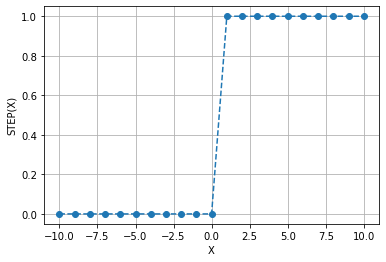

In [21]:
# def step(x):
#     if x > 0.5:
#         return 1
#     else:
#         return 0

# # y = []
# # for i in x:
# #     y.append(step(i))
# y = list(map(step, x))

y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

### Sigmoid or Logistic Activation Function


The sigmoid non-linearity has the mathematical form as bellow.

$$ \sigma (x) =  \frac{1}{1 + e^ \left(-x \right)} $$ 

it takes a real-valued number and **squashes** it into range between __0 and 1__. Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the good choice.

In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically. The sigmoid non-linearity has recently fallen out of favor and it is rarely ever used - because of the following drawbacks:

- Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
- Outputs not zero centered.
- Computationally expensive


The Sigmoid Function curve looks like a S-shape.



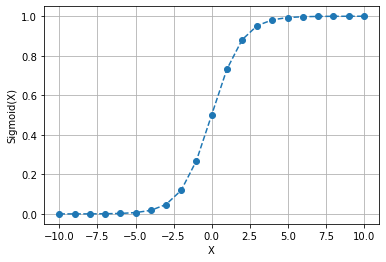

In [24]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

### Tanh

The hyperbolic tangent function is also a prevalent activation function for neural networks that must output values in the range between __-1 and 1__. This activation function is simply the hyperbolic tangent (tanh) function, as shown in the following equation:

$$ 
\begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split}                  
$$


Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. Also note that the tanh neuron is simply a scaled sigmoid neuron, in particular the following holds: 

$$ tanh(x) = 2 \sigma \left( 2x \right) -1 $$

As for Sigmoid, Tanh is highly compute-intensive and suffers from saturation problem and thus vanishing gradient. In fact, when the neuron reaches the minimum or maximum value of its range, that respectively correspond to -1 and 1, its derivative is equal to 0.

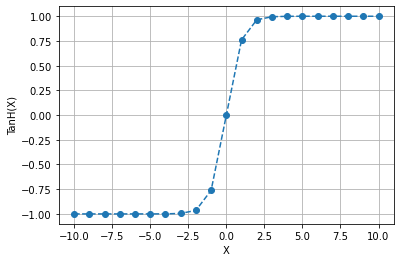

In [25]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

### Rectified Linear Units (ReLU)

The rectified linear unit (ReLU) [[@teh2001rate]](https://www.cs.toronto.edu/~hinton/absps/nips00-ywt.pdf) was introduced by Teh & Hinton in 2001. The Rectified Linear Unit has become very popular in the last few years. The following equation shows the straightforward ReLU function:


$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} 
$$

There are several pros and cons to using the ReLUs:

- It was found to greatly accelerate (e.g. a factor of 6 [[@krizhevsky2012imagenet]](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf) ) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.

- Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.

- But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.




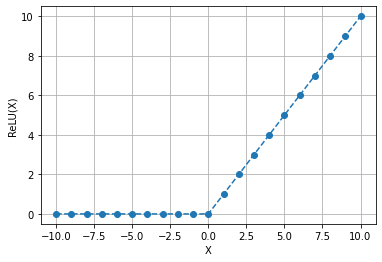

In [27]:
# def relu(x):
#     if x >= 0:
#         return x
#     else:
#         return 0
# y = list(map(relu, x))

y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

## Varients of ReLU


#### Leaky ReLU

Leaky ReLUs are one attempt to fix the “dying ReLU” problem. Instead of the function being zero when $x < 0$, a leaky ReLU will instead have a small negative slope (of 0.1, or so). That is, the function computes 

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha x       & \quad \text{if } x < 0
  \end{cases} 
$$

where α is a small constant. 

Some people report success with this form of activation function, but the results are not always consistent. 

#### PReLU

The slope in the negative region can also be made into a parameter of each neuron, as seen in PReLU neurons, introduced in Delving Deep into Rectifiers [[@he2015delving]](https://arxiv.org/pdf/1502.01852.pdf) ), by Kaiming He et al., 2015. However, the consistency of the benefit across tasks is presently unclear.

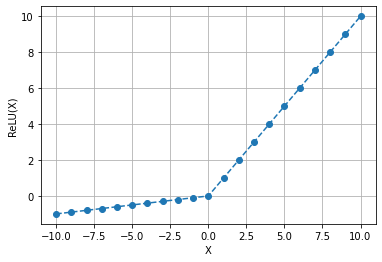

In [28]:
alpha = 0.1

y = list(map(lambda a: a if a>=0 else a*0.1, x))
plot_graph(y,"ReLU(X)")

## Softmax

Usually, the softmax function is used in the output layer of a neural network. Classification neural networks typically employ the softmax function. The neuron that has the highest value claims the input as a member of its class. Because it is a preferable method, the softmax activation function forces the output of the neural network to represent the probability that the input falls into each of the classes. Without the softmax, the neuron's outputs are simply numeric values, with the highest indicating the winning class.

$$ softmax_i(x) = \frac{e^{z_i}}{\sum\limits_{j}e^{z_j}} $$

Here, the Z represents the values from the neurons of the output layer. The exponential acts as the non-linear function. Later these values are divided by the sum of exponential values in order to normalize and then convert them into probabilities.

Note that, when the number of classes is two, it becomes the same as the sigmoid activation function. In other words, sigmoid is simply a variant of the Softmax function. 

In [33]:
from math import exp
arr = [6, 2, 9]
p1 = exp(arr[0]) / (exp(arr[0])+ exp(arr[1])+exp(arr[2]) ) 
p2 = exp(arr[1]) / (exp(arr[0])+ exp(arr[1])+exp(arr[2]) ) 
p3 = exp(arr[2]) / (exp(arr[0])+ exp(arr[1])+exp(arr[2]) ) 
print(p1,p2,p3)
print(p1+p2+p3)

0.047384713149342166 0.0008678812948896053 0.9517474055557683
1.0


<BarContainer object of 6 artists>

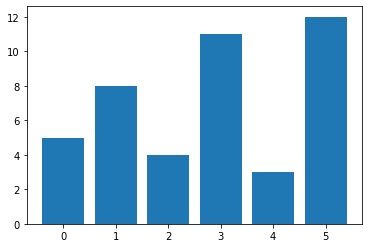

In [41]:
data = [5, 8, 4, 11, 3, 12]
plt.bar(range(len(data)), data)

In [42]:
def softmax(arr):
    e = np.exp(arr)
    return e / e.sum()
res = softmax(data)
print(res)
print(np.sum(res))

[6.57181045e-04 1.31998342e-02 2.41763396e-04 2.65125756e-01
 8.89397829e-05 7.20686525e-01]
0.9999999999999999


<BarContainer object of 6 artists>

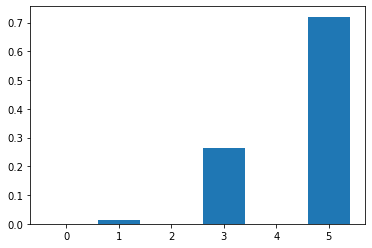

In [43]:
plt.bar(range(len(res)), res)